#            # Titanic Set
    #

In [39]:
import pandas as pd

In [40]:
df=pd.read_csv("titanic_train.csv")

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Missing values heatmap')

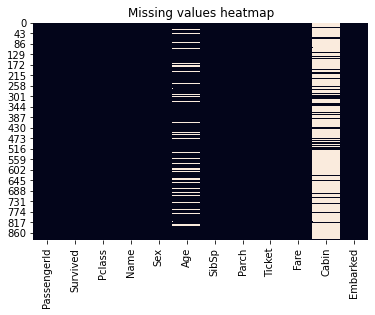

In [43]:
import seaborn as sns
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")
#helps find the columns with missing values in the dataset

In [44]:
df.isnull().sum()
#finds the number of missing value in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df['Age']=df['Age'].fillna(df['Age'].median())#replacing the missing value in the age column by median 
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())#replacing the missing value in the embarked  column by mode
df['Cabin']=df['Cabin'].fillna('Missing')#replacing null values with Missing

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [10]:
df['Family'] = df.Parch + df.SibSp
df.groupby("Family").Survived.mean()
#adding total member of the family

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [11]:
df.Age.max()


80.0

In [12]:
df.Age.min()

0.42

In [13]:
#Grouping age into different bins(min age=0,max age=80)
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)


In [14]:
df.Fare.max()

512.3292

In [15]:
df.Fare.min()

0.0

In [16]:
fare_labels = ['0-299', '300-599']
df['fare_groups'] = pd.cut(df.Fare, range(0, 601, 300), right=False, labels=fare_labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,age_group,fare_groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,1,20-29,0-299
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30-39,0-299
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0,20-29,0-299
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30-39,0-299
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,0,30-39,0-299


In [17]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df.groupby("SibSp").Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [19]:
df.groupby("Parch").Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [20]:
df['Family'] = df.Parch + df.SibSp
df.groupby("Family").Survived.mean()
#adding total member of the family

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

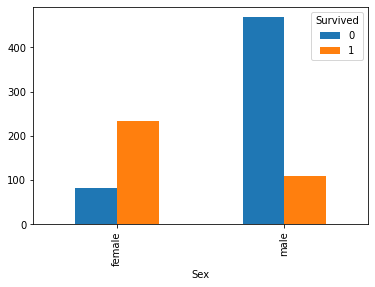

In [47]:

pd.crosstab(df.Sex,df.Survived).plot(kind='bar')
#higher deaths in case of 3rd class
df.groupby('Sex').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

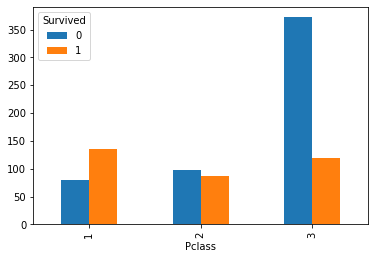

In [21]:

pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')
#higher deaths in case of 3rd class
df.groupby('Pclass').Survived.mean()
#Passengers in the first class had high survival rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

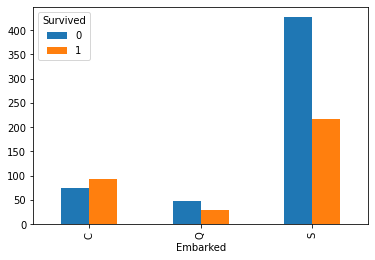

In [22]:

pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')
df.groupby('Embarked').Survived.mean()
#more people survived in C

age_group
0-9      0.612903
10-19    0.401961
20-29    0.324937
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

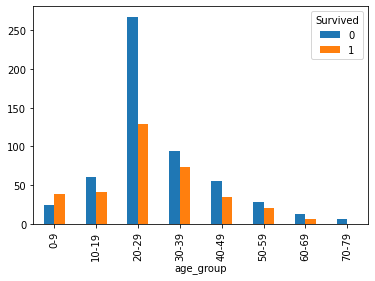

In [23]:
pd.crosstab(df.age_group,df.Survived).plot(kind='bar')
df.groupby('age_group').Survived.mean()


fare_groups
0-299      0.381757
300-599    1.000000
Name: Survived, dtype: float64

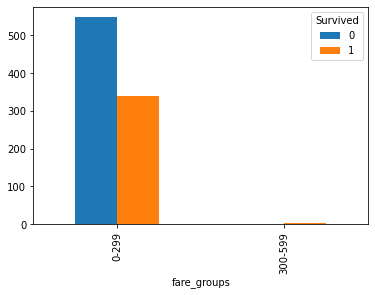

In [24]:
pd.crosstab(df.fare_groups,df.Survived).plot(kind='bar')
df.groupby('fare_groups').Survived.mean()
#dropping this column because not much diiference as mos of them belong to the same bin

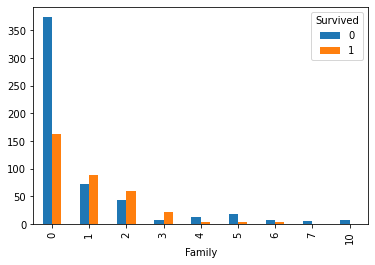

In [25]:
pd.crosstab(df.Family,df.Survived).plot(kind='bar')
#people travelling alone had higher rate to survive

In [26]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

df['Sex'] = number.fit_transform(df['Sex'].astype(str))


df['Embarked'] = number.fit_transform(df['Embarked'].astype(str))
#Convert both the categorical into numeric


In [27]:
x=pd.DataFrame(data=df,columns=(["Pclass","Sex","Age","SibSp","Parch","Embarked","Family"]))
#for train and testng of the datafrom sklearn.model_selection import train_test_split


In [28]:
y=df["Survived"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import svm

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
x_train.shape

(712, 7)

In [32]:
x_test.shape

(179, 7)

In [33]:
y_train.shape

(712,)

In [34]:
y_test.shape

(179,)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Trying different model to find the best fit

In [36]:

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_svc = round(clf.score(x_train, y_train) * 100, 2)

acc_linear_svc = round(clf.score(x_train, y_train) * 100, 2)
print (acc_linear_svc)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
acc_svc

80.62
accuracy: 0.8156424581005587


80.62

In [50]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print (acc_decision_tree)
print(confusion_matrix(y_test,y_pred_decision_tree))
print(classification_report(y_test,y_pred_decision_tree))

94.38
[[89 14]
 [25 51]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       103
           1       0.78      0.67      0.72        76

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

